# Map of best MSU locations - May 2025

With population density.

## Code setup

In [1]:
import matplotlib.pyplot as plt
import stroke_maps.load_data
import os
import pandas as pd
import geopandas as gpd

import cmasher as cmr

## Load data

Population density:

In [2]:
path_to_demog = os.path.join('..', 'data', 'LSOA_popdens.csv')

df_demog = pd.read_csv(path_to_demog)

df_demog.head()

,LSOA,population_density
0,Adur 001A,1393.0439
1,Adur 001B,1497.5704
2,Adur 001C,125.6592
3,Adur 001D,2168.2416
4,Adur 001E,2686.5747


Best MSU locations:

In [3]:
path_to_best_locs = os.path.join('..', 'data', 'sites_for_map_may2025.csv')

df_msu_best_locs = pd.read_csv(path_to_best_locs)

df_msu_best_locs.head()

,ambulance_service,configuration,time_mins,best_config_costeffect,best_config_minpatients,best_config_ambodepriv,best_config_nationaldepriv
0,EEAST,Basildon University Hospital,30,0,0,1,0
1,EEAST,Luton and Dunstable Hospital,30,1,0,0,1
2,EEAST,Luton and Dunstable Hospital,45,0,0,0,0
3,EEAST,Queen Elizabeth Hospital Kings Lynn,60,0,0,0,0
4,EEAST,Southend Hospital,45,0,0,0,0


Combine columns for units that are "best" for multiple measures:

In [4]:
best_measures = ['costeffect', 'minpatients', 'ambodepriv', 'nationaldepriv']

In [5]:
from itertools import combinations

In [6]:
for n in [2, 3, 4]:
    combos = list(combinations(best_measures, n))
    for combo in combos:
        cols = [f'best_config_{c}' for c in combo]
        new_col = 'best_config_combo_' + '_'.join(combo)
        n_here = df_msu_best_locs[cols].sum(axis='columns')
        n_here = n_here * (n_here == len(cols)).astype(int)
        df_msu_best_locs[new_col] = n_here

In [7]:
df_msu_best_locs.head().T

,0,1,2,3,4
ambulance_service,EEAST,EEAST,EEAST,EEAST,EEAST
configuration,Basildon University Hospital,Luton and Dunstable Hospital,Luton and Dunstable Hospital,Queen Elizabeth Hospital Kings Lynn,Southend Hospital
time_mins,30,30,45,60,45
best_config_costeffect,0,1,0,0,0
best_config_minpatients,0,0,0,0,0
best_config_ambodepriv,1,0,0,0,0
best_config_nationaldepriv,0,1,0,0,0
best_config_combo_costeffect_minpatients,0,0,0,0,0
best_config_combo_costeffect_ambodepriv,0,0,0,0,0
best_config_combo_costeffect_nationaldepriv,0,2,0,0,0


Now update the data so that only the column with the most entries is valid.

In [8]:
config_cols = [c for c in df_msu_best_locs.columns if 'best_config' in c]

max_n_here = df_msu_best_locs[config_cols].max(axis='columns')

df_msu_best_locs['max'] = max_n_here

In [9]:
for row in df_msu_best_locs[config_cols].index:
    bool_here = df_msu_best_locs.iloc[row][config_cols] == df_msu_best_locs.iloc[row]['max']
    if all(bool_here):
        pass
    else:
        new_row = df_msu_best_locs.iloc[row][config_cols] * bool_here
        df_msu_best_locs.iloc[row, df_msu_best_locs.columns.get_indexer(config_cols)] = new_row

In [10]:
df_msu_best_locs[config_cols] = (df_msu_best_locs[config_cols] > 0).astype(int)

In [11]:
df_msu_best_locs.head().T

,0,1,2,3,4
ambulance_service,EEAST,EEAST,EEAST,EEAST,EEAST
configuration,Basildon University Hospital,Luton and Dunstable Hospital,Luton and Dunstable Hospital,Queen Elizabeth Hospital Kings Lynn,Southend Hospital
time_mins,30,30,45,60,45
best_config_costeffect,0,0,0,0,0
best_config_minpatients,0,0,0,0,0
best_config_ambodepriv,1,0,0,0,0
best_config_nationaldepriv,0,0,0,0,0
best_config_combo_costeffect_minpatients,0,0,0,0,0
best_config_combo_costeffect_ambodepriv,0,0,0,0,0
best_config_combo_costeffect_nationaldepriv,0,1,0,0,0


In [12]:
df_msu_best_locs.columns

Index(['ambulance_service', 'configuration', 'time_mins',
       'best_config_costeffect', 'best_config_minpatients',
       'best_config_ambodepriv', 'best_config_nationaldepriv',
       'best_config_combo_costeffect_minpatients',
       'best_config_combo_costeffect_ambodepriv',
       'best_config_combo_costeffect_nationaldepriv',
       'best_config_combo_minpatients_ambodepriv',
       'best_config_combo_minpatients_nationaldepriv',
       'best_config_combo_ambodepriv_nationaldepriv',
       'best_config_combo_costeffect_minpatients_ambodepriv',
       'best_config_combo_costeffect_minpatients_nationaldepriv',
       'best_config_combo_costeffect_ambodepriv_nationaldepriv',
       'best_config_combo_minpatients_ambodepriv_nationaldepriv',
       'best_config_combo_costeffect_minpatients_ambodepriv_nationaldepriv',
       'max'],
      dtype='object')

Plotting tests:

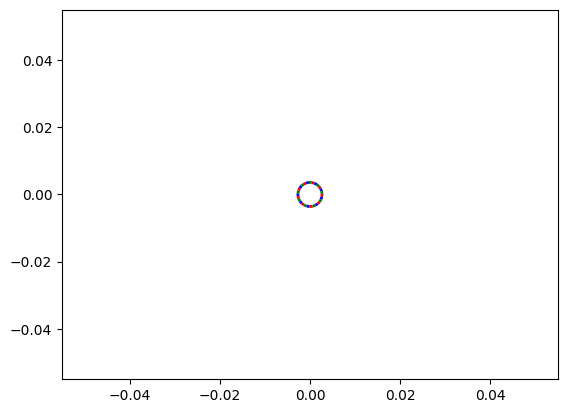

In [13]:
fig, ax = plt.subplots()

ax.scatter([0], [0], marker='o', s=300, facecolor='None', linestyle=(0, (1, 2)), edgecolor='r', linewidth=2)
ax.scatter([0], [0], marker='o', s=300, facecolor='None', linestyle=(1, (1, 2)), edgecolor='b', linewidth=2)
ax.scatter([0], [0], marker='o', s=300, facecolor='None', linestyle=(2, (1, 2)), edgecolor='g', linewidth=2)

plt.show()

In [14]:
import numpy as np

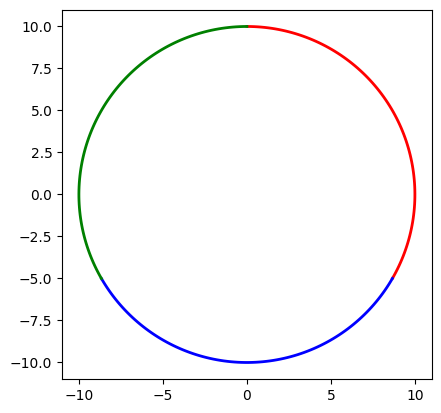

In [15]:
fig, ax = plt.subplots()

def plot_segment(ax, x_cent, y_cent, radius, angle_start, angle_end, **kwargs):
    angle_start = angle_start * np.pi / 180.0
    angle_end = angle_end * np.pi / 180.0
    x = x_cent + radius * np.sin(np.linspace(angle_start, angle_end, 100))
    y = y_cent + radius * np.cos(np.linspace(angle_start, angle_end, 100))
    ax.plot(x, y, **kwargs)

plot_segment(ax, [0], [0], 10, 0, 120, color='r', linewidth=2)
plot_segment(ax, [0], [0], 10, 120, 240, color='b', linewidth=2)
plot_segment(ax, [0], [0], 10, 240, 360, color='g', linewidth=2)

ax.set_aspect('equal')

plt.show()

In [16]:
df_msu_best_locs.columns

Index(['ambulance_service', 'configuration', 'time_mins',
       'best_config_costeffect', 'best_config_minpatients',
       'best_config_ambodepriv', 'best_config_nationaldepriv',
       'best_config_combo_costeffect_minpatients',
       'best_config_combo_costeffect_ambodepriv',
       'best_config_combo_costeffect_nationaldepriv',
       'best_config_combo_minpatients_ambodepriv',
       'best_config_combo_minpatients_nationaldepriv',
       'best_config_combo_ambodepriv_nationaldepriv',
       'best_config_combo_costeffect_minpatients_ambodepriv',
       'best_config_combo_costeffect_minpatients_nationaldepriv',
       'best_config_combo_costeffect_ambodepriv_nationaldepriv',
       'best_config_combo_minpatients_ambodepriv_nationaldepriv',
       'best_config_combo_costeffect_minpatients_ambodepriv_nationaldepriv',
       'max'],
      dtype='object')

In [17]:
seaborn_yellow = '#ece133'
seaborn_lightblue = '#56b4e9'
seaborn_blue = '#0173b2'
seaborn_orange = '#de8f05'
seaborn_green = '#029e73'
seaborn_red = '#d55e00'
seaborn_pink = '#cc78bc'
seaborn_brown = '#ca9161'
seaborn_lightpink = '#fbafe4'
seaborn_grey = '#949494'

In [77]:
colours = plt.get_cmap('plasma')(np.linspace(0.2, 1.0, 4))

In [79]:
colour_dict = dict(
    # costeffect = seaborn_green,
    # minpatients = seaborn_yellow,
    # ambodepriv = seaborn_blue,
    # nationaldepriv = seaborn_red,
    costeffect = colours[0],
    minpatients = colours[1],
    ambodepriv = colours[2],
    nationaldepriv = colours[3],
    background = 'k'
)

In [49]:
def plot_multi_circle(ax, x_cents, y_cents, col, colour_dict, **kwargs):
    try:
        cols_combined = col.split('combo_')[1].split('_')
    except IndexError:
        cols_combined = col.split('best_config_')[1].split('_')
    
    angle_start = 0.0
    angle_step = 2.0 * np.pi / len(cols_combined)
    angle_end = angle_start + angle_step
    
    for col in cols_combined:
    
        x1 = np.sin(np.linspace(angle_start, angle_end, 100))
        y1 = np.cos(np.linspace(angle_start, angle_end, 100))
        xy1 = np.column_stack([x1, y1])
        
        ax.plot(x_cents, y_cents, marker=xy1,
                markerfacecolor='None',
                markeredgecolor=colour_dict[col],
                **kwargs
               )
    
        angle_start += angle_step
        angle_end += angle_step
       

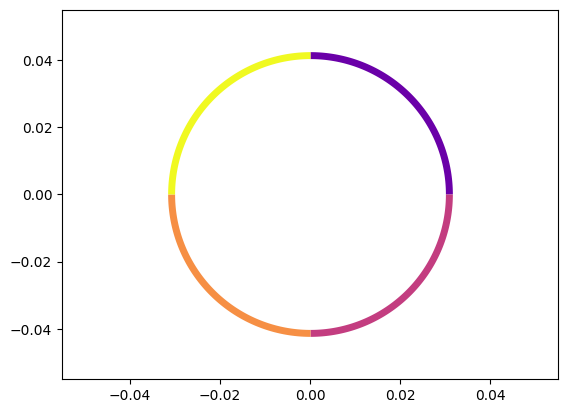

In [81]:
col = 'best_config_combo_costeffect_minpatients_ambodepriv_nationaldepriv'

x_cents = [0.0]
y_cents = [0.0]


fig, ax = plt.subplots()
    
plot_multi_circle(ax, x_cents, y_cents, col, colour_dict, ms=200, markeredgewidth=5.0)

plt.show()

In [21]:
df_msu_best_locs

,ambulance_service,configuration,time_mins,best_config_costeffect,best_config_minpatients,best_config_ambodepriv,best_config_nationaldepriv,best_config_combo_costeffect_minpatients,best_config_combo_costeffect_ambodepriv,best_config_combo_costeffect_nationaldepriv,best_config_combo_minpatients_ambodepriv,best_config_combo_minpatients_nationaldepriv,best_config_combo_ambodepriv_nationaldepriv,best_config_combo_costeffect_minpatients_ambodepriv,best_config_combo_costeffect_minpatients_nationaldepriv,best_config_combo_costeffect_ambodepriv_nationaldepriv,best_config_combo_minpatients_ambodepriv_nationaldepriv,best_config_combo_costeffect_minpatients_ambodepriv_nationaldepriv,max
0,EEAST,Basildon University Hospital,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,EEAST,Luton and Dunstable Hospital,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
2,EEAST,Luton and Dunstable Hospital,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,EEAST,Queen Elizabeth Hospital Kings Lynn,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,EEAST,Southend Hospital,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,EEAST,Watford General Hospital,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,EMAS,Kings Mill Hospital,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
7,EMAS,Leicester Royal Infirmary,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,EMAS,Northampton General Hospital,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,LAS,Northwick Park Hospital HASU,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [22]:
df_msu_best_locs['combo_best_config_costeffect_minpatients'] = df_msu_best_locs['best_

SyntaxError: EOL while scanning string literal (3653452737.py, line 1)

Stroke unit name-postcode lookup:

In [23]:
df_units = stroke_maps.load_data.stroke_unit_region_lookup()

df_units.head(3).T

postcode,RM70AG,E11BB,SW66SX
stroke_team,Havering and Redbridge University Hospitals NH...,The Royal London Hospital,"Charing Cross Hospital, London"
ssnap_name,Queens Hospital Romford HASU,Royal London Hospital HASU,Charing Cross Hospital HASU
hospital_city,Romford,Royal London,Charing Cross
use_ivt,1,1,1
use_mt,1,1,1
lsoa,Havering 017C,Tower Hamlets 017A,Hammersmith and Fulham 022C
lsoa_code,E01002248,E01004322,E01001906
region,NHS North East London ICB - A3A8R,NHS North East London ICB - A3A8R,NHS North West London ICB - W2U3Z
region_code,E38000255,E38000255,E38000256
region_type,SICBL,SICBL,SICBL


### Geography

LSOA shapes:

In [24]:
gdf_lsoa = stroke_maps.load_data.lsoa_geography()

# Convert to British National Grid:
gdf_lsoa = gdf_lsoa.to_crs('EPSG:27700')

gdf_lsoa.head(3).T

,0,1,2
OBJECTID,1,2,3
LSOA11CD,E01000001,E01000002,E01000003
LSOA11NM,City of London 001A,City of London 001B,City of London 001C
LSOA11NMW,City of London 001A,City of London 001B,City of London 001C
BNG_E,532129,532480,532245
BNG_N,181625,181699,182036
LONG,-0.09706,-0.09197,-0.09523
LAT,51.5181,51.51868,51.52176
Shape__Area,157794.481079,164882.427628,42219.805717
Shape__Length,1685.391778,1804.828196,909.223277


Remove Wales:

In [25]:
mask_england = gdf_lsoa['LSOA11CD'].str.startswith('E')

gdf_lsoa = gdf_lsoa[mask_england].copy()

Ambulance service regions:

In [26]:
gdf_ambo22 = stroke_maps.load_data.ambulance22_geography()

gdf_ambo22.head(3)

,ambo22,geometry
0,EEAST,"MULTIPOLYGON (((504078.594 192959.141, 504011...."
1,EMAS,"MULTIPOLYGON (((427187.406 311340.906, 427226...."
2,IWAS,"MULTIPOLYGON (((450897.496 75508.595, 450613.3..."


Remove Wales ambulance service:

In [27]:
mask_england = gdf_ambo22['ambo22'] != 'WAST'

gdf_ambo22 = gdf_ambo22[mask_england].copy()

Stroke unit locations:

In [28]:
gdf_unit_coords = stroke_maps.load_data.stroke_unit_coordinates()

gdf_unit_coords.head(3)

,BNG_E,BNG_N,Latitude,Longitude,geometry
postcode,,,,,
RM70AG,551110,187777,51.568622,0.178914,POINT (551110 187777)
E11BB,534833,181799,51.519026,-0.058075,POINT (534833 181799)
SW66SX,524227,176487,51.473716,-0.212722,POINT (524227 176487)


Major roads:

In [29]:
path_to_roads = os.path.join('..', 'data', 'major_roads_with_short_names.geojson')

gdf_roads = gpd.read_file(path_to_roads)
gdf_roads = gdf_roads.set_index('roadNumber')

gdf_roads.head()

,function,geometry
roadNumber,,
A1,A Road,"MULTILINESTRING Z ((325846.71 674006.48 0, 325..."
A1(M),Motorway,"MULTILINESTRING Z ((421602.19 505924.22 0, 421..."
A10,A Road,"MULTILINESTRING Z ((532556.15 192610.27 0, 532..."
A11,A Road,"MULTILINESTRING Z ((533740.06 181263.95 0, 533..."
A12,A Road,"MULTILINESTRING Z ((537073.98 185270.05 0, 537..."


Keep only England:

In [30]:
gdf_roads = gpd.clip(gdf_roads, gdf_lsoa['geometry'])

## Set up background map data

Merge the population density info into the LSOA shapes.

In [31]:
gdf_lsoa = pd.merge(
    gdf_lsoa, df_demog,
    left_on='LSOA11NM', right_on='LSOA', how='left'
    )

In [32]:
gdf_lsoa.head(3)

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry,LSOA,population_density
0,1,E01000001,City of London 001A,City of London 001A,532129,181625,-0.09706,51.51810,157794.481079,1685.391778,b12173a3-5423-4672-a5eb-f152d2345f96,"POLYGON ((532282.642 181906.5, 532248.262 1813...",City of London 001A,5085.6719
1,2,E01000002,City of London 001B,City of London 001B,532480,181699,-0.09197,51.51868,164882.427628,1804.828196,90274dc4-f785-4afb-95cd-7cc1fc9a2cad,"POLYGON ((532746.826 181786.896, 532248.262 18...",City of London 001B,2875.8785
2,3,E01000003,City of London 001C,City of London 001C,532245,182036,-0.09523,51.52176,42219.805717,909.223277,7e89d0ba-f186-45fb-961c-8f5ffcd03808,"POLYGON ((532293.08 182068.426, 532419.605 181...",City of London 001C,12851.7717


## Set up best location data

Link best unit names with postcodes.

Find the postcode that matches each unit name:

In [33]:
dict_unit_lookup = {}

for unit in df_msu_best_locs['configuration']:
    # Remove any leading or trailing whitespace:
    unit_str = unit.lstrip(' ').rstrip(' ')
    if unit_str in df_units['stroke_team'].values:
        dict_unit_lookup[unit] = df_units[df_units['stroke_team'] == unit_str].index.values[0]
    elif unit_str in df_units['ssnap_name'].values:
        dict_unit_lookup[unit] = df_units[df_units['ssnap_name'] == unit_str].index.values[0]
    else:
        # This shouldn't happen!
        dict_unit_lookup[unit] = '??'

Merge these postcodes into the starting data:

In [34]:
df_msu_best_locs['postcode'] = df_msu_best_locs['configuration'].map(dict_unit_lookup)

In [35]:
df_msu_best_locs

,ambulance_service,configuration,time_mins,best_config_costeffect,best_config_minpatients,best_config_ambodepriv,best_config_nationaldepriv,best_config_combo_costeffect_minpatients,best_config_combo_costeffect_ambodepriv,best_config_combo_costeffect_nationaldepriv,best_config_combo_minpatients_ambodepriv,best_config_combo_minpatients_nationaldepriv,best_config_combo_ambodepriv_nationaldepriv,best_config_combo_costeffect_minpatients_ambodepriv,best_config_combo_costeffect_minpatients_nationaldepriv,best_config_combo_costeffect_ambodepriv_nationaldepriv,best_config_combo_minpatients_ambodepriv_nationaldepriv,best_config_combo_costeffect_minpatients_ambodepriv_nationaldepriv,max,postcode
0,EEAST,Basildon University Hospital,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,SS165NL
1,EEAST,Luton and Dunstable Hospital,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,LU40DZ
2,EEAST,Luton and Dunstable Hospital,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LU40DZ
3,EEAST,Queen Elizabeth Hospital Kings Lynn,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PE304ET
4,EEAST,Southend Hospital,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SS00RY
5,EEAST,Watford General Hospital,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,WD180HB
6,EMAS,Kings Mill Hospital,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,NG174JL
7,EMAS,Leicester Royal Infirmary,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,LE15WW
8,EMAS,Northampton General Hospital,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NN15BD
9,LAS,Northwick Park Hospital HASU,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,HA13UJ


Link best unit data with coordinates:

In [36]:
gdf_unit_coords = pd.merge(gdf_unit_coords, df_msu_best_locs.set_index('postcode'), left_index=True, right_index=True, how='left')

gdf_unit_coords.head(3)

,BNG_E,BNG_N,Latitude,Longitude,geometry,ambulance_service,configuration,time_mins,best_config_costeffect,best_config_minpatients,...,best_config_combo_costeffect_nationaldepriv,best_config_combo_minpatients_ambodepriv,best_config_combo_minpatients_nationaldepriv,best_config_combo_ambodepriv_nationaldepriv,best_config_combo_costeffect_minpatients_ambodepriv,best_config_combo_costeffect_minpatients_nationaldepriv,best_config_combo_costeffect_ambodepriv_nationaldepriv,best_config_combo_minpatients_ambodepriv_nationaldepriv,best_config_combo_costeffect_minpatients_ambodepriv_nationaldepriv,max
postcode,,,,,,,,,,,,,,,,,,,,,
B152TH,404427,283926,52.453272,-1.936284,POINT (404427 283926),WMAS,Queen Elizabeth Hospital Edgbaston,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B714HJ,400919,292165,52.527357,-1.987884,POINT (400919 292165),WMAS,Sandwell District Hospital,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B95SS,411645,286935,52.480218,-1.829966,POINT (411645 286935),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot maps

In [37]:
# from matplotlib.patches import Circle, Rectangle
from matplotlib.patches import Patch
import matplotlib.lines as mlines

In [ ]:
# Set up fig:
fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [40, 1], 'hspace': 0.05, })
ax = axs[0]
ax_cbar = axs[1]

# Draw background population density:
gdf_lsoa.plot(
    ax=ax,
    column='population_density',
    cmap='cmr.ocean_r',  # 'cmr.neutral_r',  # 'cmr.arctic_r'
    vmin=0, vmax=100,
    edgecolor='face',
    legend=True,
    legend_kwds={
        'shrink': 0.5,
        'label': 'Population density (people per square kilometre)',
        'cax': ax_cbar,
        'orientation': 'horizontal',
    },
)

# Draw major roads:
colour_roads_ambo = 'k'
roads_kwargs = dict(color=colour_roads_ambo, linewidth=0.5, alpha=0.8, label='Major roads')
gdf_roads.plot(ax=ax, **roads_kwargs)
patch_roads = mlines.Line2D([], [], **roads_kwargs)

# Draw ambulance service regions:
ambo_kwargs = dict(facecolor='None', edgecolor=colour_roads_ambo, linewidth=1, label='Ambulance service regions')
gdf_ambo22.plot(ax=ax, **ambo_kwargs)
patch_ambo = Patch(**ambo_kwargs)

# Stroke unit setup:
unit_time_masks = {}
times = [30, 45, 60]
for t in times:
    unit_time_masks[t] = gdf_unit_coords['time_mins'] == t

unit_marker_kwargs = {}
unit_marker_kwargs[30] = dict(facecolor='r', edgecolor='k', label="Within 30 minutes' travel time", marker='o', zorder=6)#, markersize=60, linewidth=1)
unit_marker_kwargs[45] = dict(facecolor='g', edgecolor='k', label="Within 45 minutes' travel time", marker='o', zorder=5)#, markersize=60, linewidth=1)
unit_marker_kwargs[60] = dict(facecolor='purple', edgecolor='k', label="Within 60 minutes' travel time", marker='o', zorder=4)#, markersize=60, linewidth=1)

# Draw stroke units:
handles_for_legend = []
for t in times:
    mask_best = unit_time_masks[t] & (gdf_unit_coords['best_config'] == 1)
    mask_not_best = unit_time_masks[t] & (gdf_unit_coords['best_config'] != 1)

    unit_marker_kwargs_best = unit_marker_kwargs[t] | dict(label=None, marker='s', edgecolor='k', zorder=3)  # marker='s', label=None) markersize=80, 
    
    # h = gdf_unit_coords[mask_not_best].plot(ax=ax, **unit_marker_kwargs[t])
    h = ax.scatter(
        gdf_unit_coords.loc[mask_not_best, 'BNG_E'],
        gdf_unit_coords.loc[mask_not_best, 'BNG_N'],
        **unit_marker_kwargs[t]
    )
    handles_for_legend.append(h)
    # h = gdf_unit_coords[mask_best].plot(ax=ax, **unit_marker_kwargs_best)
    h = ax.scatter(
        gdf_unit_coords.loc[mask_best, 'BNG_E'],
        gdf_unit_coords.loc[mask_best, 'BNG_N'],
        **unit_marker_kwargs_best
    )
    # handles_for_legend.append(h)

# # Draw legend:

patch_best = mlines.Line2D(
    [], [],
    color='w', markeredgecolor='k', marker='s', linestyle='None',
    markersize=10,
    label='Most effective option within\nan ambulance service'
)

patch_not_best = mlines.Line2D(
    [], [],
    color='w', markeredgecolor='k', marker='o', linestyle='None',
    markersize=10,
    label='Options within an ambulance service\nthat trade benefits for equity'
)

handles_for_legend += [patch_best, patch_not_best, patch_ambo, patch_roads]

ax.legend(handles=handles_for_legend, loc='upper left', bbox_to_anchor=[1.0, 1.0])

# # TO DO - final marker sizes/colours


# Remove frame and coordinate labels:
ax.axis('off')

plt.savefig('map_msu_best_locations_may2025.png', bbox_inches='tight')
plt.show()

## Gaps between regions

In [ ]:
gdf_ambo22

In [ ]:
gdf_lsoa

In [ ]:
gdf_units_here['geometry'].x

In [47]:
df_msu_best_locs

,ambulance_service,configuration,time_mins,best_config_costeffect,best_config_minpatients,best_config_ambodepriv,best_config_nationaldepriv,best_config_combo_costeffect_minpatients,best_config_combo_costeffect_ambodepriv,best_config_combo_costeffect_nationaldepriv,best_config_combo_minpatients_ambodepriv,best_config_combo_minpatients_nationaldepriv,best_config_combo_ambodepriv_nationaldepriv,best_config_combo_costeffect_minpatients_ambodepriv,best_config_combo_costeffect_minpatients_nationaldepriv,best_config_combo_costeffect_ambodepriv_nationaldepriv,best_config_combo_minpatients_ambodepriv_nationaldepriv,best_config_combo_costeffect_minpatients_ambodepriv_nationaldepriv,max,postcode
0,EEAST,Basildon University Hospital,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,SS165NL
1,EEAST,Luton and Dunstable Hospital,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,LU40DZ
2,EEAST,Luton and Dunstable Hospital,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LU40DZ
3,EEAST,Queen Elizabeth Hospital Kings Lynn,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PE304ET
4,EEAST,Southend Hospital,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SS00RY
5,EEAST,Watford General Hospital,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,WD180HB
6,EMAS,Kings Mill Hospital,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,NG174JL
7,EMAS,Leicester Royal Infirmary,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,LE15WW
8,EMAS,Northampton General Hospital,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NN15BD
9,LAS,Northwick Park Hospital HASU,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,HA13UJ


In [55]:
cols_best = [c for c in df_msu_best_locs.columns if 'best_config' in c]

/tmp/ipykernel_111205/2885652160.py:64: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_roads_here.plot(ax=ax, **roads_kwargs)


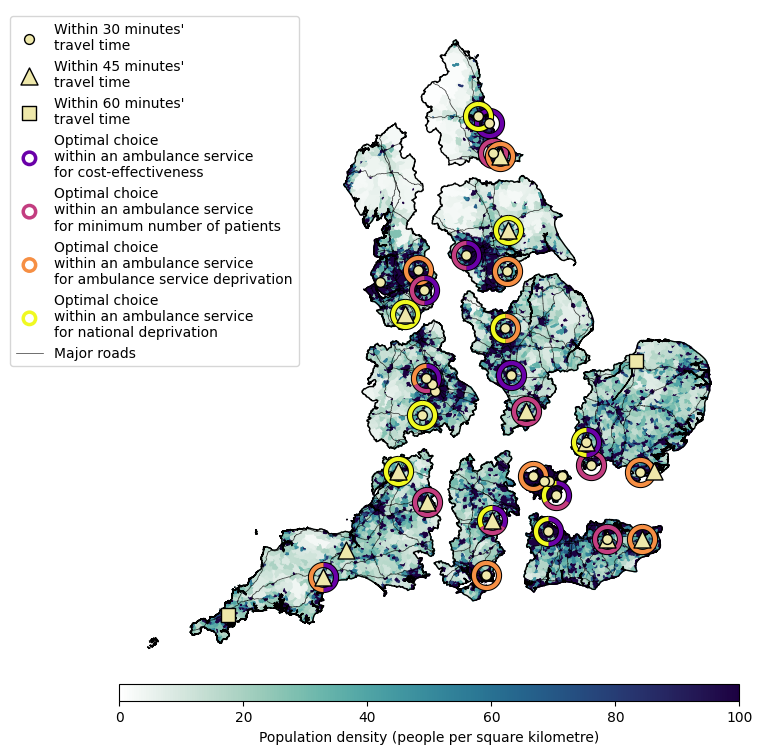

In [88]:
# Set up fig:
fig, axs = plt.subplots(2, 1, figsize=(8, 9), gridspec_kw={'height_ratios': [40, 1], 'hspace': 0.01, })
ax = axs[0]
ax_cbar = axs[1]

u = 25000
ambo_dict = {
    'EEAST': {'x_off': 3*u, 'y_off': u*0.25},
    'EMAS': {'x_off': u*1.25, 'y_off': u*0.25},
    # 'IWAS': {'x_off': -u*0.25, 'y_off': -u*1.5},
    'LAS': {'x_off': 0, 'y_off': 0},
    'NEAS': {'x_off': u, 'y_off': u*2.25},
    'NWAS': {'x_off': -u*0.25, 'y_off': u},
    'SCAS': {'x_off': -u*0.25, 'y_off': -u*1.5},
    'SECAmb': {'x_off': u*1.25, 'y_off': -u*1.75},
    'SWAS': {'x_off': -u*1.25, 'y_off': -u},
    'WMAS': {'x_off': -u*0.25, 'y_off': u*0.25},
    'YAS': {'x_off': u, 'y_off': u*1.25},
}
# Keep the Isle of Wight with South Central:
ambo_dict['IWAS'] = ambo_dict['SCAS']

for a, ambo_service in enumerate(ambo_dict.keys()):
    # Limit gdfs to only this region:
    gdf_ambo_here = gdf_ambo22.loc[gdf_ambo22['ambo22'] == ambo_service].copy()
    gdf_lsoa_here = gpd.clip(gdf_lsoa, gdf_ambo_here['geometry']).copy()
    gdf_roads_here = gpd.clip(gdf_roads, gdf_ambo_here['geometry']).copy()
    gdf_units_here = gpd.clip(gdf_unit_coords, gdf_ambo_here['geometry']).copy()

    
    # Add offsets:
    xoff = ambo_dict[ambo_service]['x_off']
    yoff = ambo_dict[ambo_service]['y_off']
    gdf_ambo_here['geometry'] = gdf_ambo_here['geometry'].translate(xoff=xoff, yoff=yoff,)
    gdf_lsoa_here['geometry'] = gdf_lsoa_here['geometry'].translate(xoff=xoff, yoff=yoff,)
    gdf_roads_here['geometry'] = gdf_roads_here['geometry'].translate(xoff=xoff, yoff=yoff,)
    gdf_units_here['geometry'] = gdf_units_here['geometry'].translate(xoff=xoff, yoff=yoff,)
    # Copy new coordinates:
    gdf_units_here['x'] = gdf_units_here['geometry'].x
    gdf_units_here['y'] = gdf_units_here['geometry'].y
    
    # display(gdf_ambo_here)
    # display(gdf_lsoa_here)
    
    # Draw background population density:
    gdf_lsoa_here.plot(
        ax=ax,
        column='population_density',
        cmap='cmr.ocean_r',  # 'cmr.neutral_r',  # 'cmr.arctic_r'
        vmin=0, vmax=100,
        edgecolor='face',
        legend=True,
        legend_kwds={
            'shrink': 0.5,
            'label': 'Population density (people per square kilometre)',
            'cax': ax_cbar,
            'orientation': 'horizontal',
        },
    )
    
    # Draw major roads:
    colour_roads_ambo = 'k'
    roads_kwargs = dict(color=colour_roads_ambo, linewidth=0.5, alpha=0.8, label='Major roads')
    gdf_roads_here.plot(ax=ax, **roads_kwargs)
    patch_roads = mlines.Line2D([], [], **roads_kwargs)
    
    # Draw ambulance service regions:
    ambo_kwargs = dict(facecolor='None', edgecolor=colour_roads_ambo, linewidth=1, label='Ambulance service regions')
    gdf_ambo_here.plot(ax=ax, **ambo_kwargs)
    ambo_patch_kwargs = {}
    for key, value in ambo_kwargs.items():
        if key == 'edgecolor':
            ambo_patch_kwargs['color'] = value
        elif key == 'facecolor':
            pass
        else:
            ambo_patch_kwargs[key] = value
    patch_ambo = mlines.Line2D([], [], **ambo_patch_kwargs)
    # patch_ambo = Patch(**ambo_kwargs)
    
    # Stroke unit setup:
    unit_time_masks = {}
    times = [30, 45, 60]
    for t in times:
        unit_time_masks[t] = gdf_units_here['time_mins'] == t
    
    unit_marker_kwargs = {}
    unit_marker_kwargs[30] = dict(
        facecolor='PaleGoldenrod',
        edgecolor='k', label="Within 30 minutes'\ntravel time", marker='o', zorder=6, s=50)#, markersize=60, linewidth=1)
    unit_marker_kwargs[45] = dict(
        # facecolor='Goldenrod',
        facecolor='PaleGoldenrod',
        edgecolor='k', label="Within 45 minutes'\ntravel time", marker='^', zorder=5, s=150)#, markersize=60, linewidth=1)
    unit_marker_kwargs[60] = dict(
        # facecolor='#775707',
        facecolor='PaleGoldenrod',
        edgecolor='k', label="Within 60 minutes'\ntravel time", marker='s', zorder=4, s=100)#, markersize=60, linewidth=1)
    
    # Draw stroke units:
    handles_for_legend = []
    for t in times:
        
        # mask_best = unit_time_masks[t] & (gdf_units_here['best_config'] == 1)
        # mask_not_best = unit_time_masks[t] & (gdf_units_here['best_config'] != 1)
    
        # unit_marker_kwargs_best = unit_marker_kwargs[t] | dict(label=None, marker='o', facecolor='None', edgecolor='r', linewidth=2, zorder=3, s=150)  # marker='s', label=None) markersize=80, 
        
        # h = gdf_unit_coords[mask_not_best].plot(ax=ax, **unit_marker_kwargs[t])
        h = ax.scatter(
            # gdf_units_here.loc[mask_not_best, 'x'],
            # gdf_units_here.loc[mask_not_best, 'y'],
            gdf_units_here.loc[unit_time_masks[t], 'x'],
            gdf_units_here.loc[unit_time_masks[t], 'y'],
            **unit_marker_kwargs[t]
        )
        handles_for_legend.append(h)

    kwargs_best = dict(marker='o', facecolor='None', edgecolor='r', linewidth=3, zorder=3, s=18) # marker='s', label=None) markersize=80, 


            
    # for col_best, best_dict in dict_cols_best.items():
    for col_best in cols_best:
        mask_best = (gdf_units_here[col_best] == 1)
        # unit_marker_kwargs_best = kwargs_best# | best_dict 
        # h = gdf_unit_coords[mask_best].plot(ax=ax, **unit_marker_kwargs_best)
        if len(mask_best[mask_best]) > 0:
            plot_multi_circle(ax, gdf_units_here.loc[mask_best, 'x'], gdf_units_here.loc[mask_best, 'y'], 'best_config_background', colour_dict, ms=kwargs_best['s'], markeredgewidth=kwargs_best['linewidth']*1.5)
            plot_multi_circle(ax, gdf_units_here.loc[mask_best, 'x'], gdf_units_here.loc[mask_best, 'y'], col_best, colour_dict, ms=kwargs_best['s'], markeredgewidth=kwargs_best['linewidth'])
    
    # # Draw legend:
    
    # patch_best = mlines.Line2D(
    #     [], [],
    #     color='w', markeredgecolor='k', marker='^', linestyle='None',
    #     markersize=10,
    #     label='Most effective option within\nan ambulance service'
    # )
    
    # patch_not_best = mlines.Line2D(
    #     [], [],
    #     color='w', markeredgecolor='k', marker='o', linestyle='None',
    #     markersize=10,
    #     label='Options within an ambulance service\nthat trade benefits for equity'
    # )
            

    # Draw the legend if this region has all of the markers in it.
    if ambo_service == 'EEAST':
        handles_for_legend_to_keep = handles_for_legend


dict_cols_best = {
    'best_config_costeffect': dict(
        label='Optimal choice\nwithin an ambulance service\nfor cost-effectiveness',
        edgecolor=colour_dict['costeffect'],
        # s=220,
    ),
    'best_config_minpatients': dict(
        label='Optimal choice\nwithin an ambulance service\nfor minimum number of patients',
        edgecolor=colour_dict['minpatients'],
        # s=280,
    ),
    'best_config_ambodepriv': dict(
        label='Optimal choice\nwithin an ambulance service\nfor ambulance service deprivation',
        edgecolor=colour_dict['ambodepriv'],
        # s=340,
    ),
    'best_config_nationaldepriv': dict(
        label='Optimal choice\nwithin an ambulance service\nfor national deprivation',
        edgecolor=colour_dict['nationaldepriv'],
        # s=400
    ),
}


# Dummy for legend:
xlim = ax.get_xlim()
ylim = ax.get_ylim()
kwargs_best = dict(marker='o', facecolor='None', linewidth=2.5, zorder=3, s=80) # marker='s', label=None) markersize=80, 
for col_best, best_dict in dict_cols_best.items():
    if 'combo' not in col_best:
        # Dummy marker for legend:
        best_for_legend = kwargs_best | best_dict
        
        h = ax.scatter(
            [-42000],
            [-42000],
            **best_for_legend
        )
        handles_for_legend_to_keep.append(h)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

handles_for_legend_to_keep += [
    # patch_best, patch_not_best,
    # patch_ambo,
    patch_roads
]

ax.legend(handles=handles_for_legend_to_keep, loc='upper right', bbox_to_anchor=[0.3, 1.0])
        
    
    # # TO DO - final marker sizes/colours


# Remove frame and coordinate labels:
ax.axis('off')

plt.savefig('map_msu_best_locations_each_may2025.png', bbox_inches='tight')
plt.show()